In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


In [2]:
# Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(r"/kaggle/input/zomato-bangalore-restaurants/zomato.csv",encoding="ISO-8859-1")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.shape

(51717, 17)

In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
df =df.drop(["url","address","phone","menu_item","dish_liked","reviews_list"],axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [7]:
df.drop_duplicates(inplace=True)
df.shape

(51609, 11)

In [8]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

**REMOVING "NEW" , "-" , "/3" FROM RATE COLUMN**

In [9]:
def handlerate(value):
    if(value == "NEW" or value == "-"):
        return np.nan
    else:
        value = str(value).split("/")
        value = value[0]
        return float(value)
    
df["rate"] = df["rate"].apply(handlerate)
df["rate"].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

**FILLING NULL VALUES IN RATE COLUMN WITH MEAN**

In [10]:
df["rate"].isnull().sum()

10019

In [11]:
df["rate"].fillna(df["rate"].mean(),inplace=True)
df["rate"].isnull().sum()

/tmp/ipykernel_18/897639183.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rate"].fillna(df["rate"].mean(),inplace=True)


0

In [12]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


(51609, 11)

**DROPING THE NULL VALUES**

In [13]:
df.rename(columns={"approx_cost(for two people)": "Cost2plates",
                  "listed_in(type)":"Type"},inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [14]:
df["Cost2plates"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [15]:
def handlecomma(value):
    value = str(value)
    if "," in value :
        value = value.replace(",","")
        return float(value)
    else:
        return float(value)
    
df["Cost2plates"] = df["Cost2plates"].apply(handlecomma)
df["Cost2plates"].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

**CLEANING REST TYPE COLUMN**

In [16]:
df["rest_type"].value_counts()


rest_type
Quick Bites                   19096
Casual Dining                 10309
Cafe                           3727
Delivery                       2600
Dessert Parlor                 2260
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: count, Length: 93, dtype: int64

In [17]:
rest_type = df["rest_type"].value_counts(ascending=False)
rest_type 

rest_type_lessthan1000 = rest_type[rest_type<1000]
rest_type_lessthan1000


rest_type
Beverage Shop                 865
Bar                           697
Food Court                    621
Sweet Shop                    468
Bar, Casual Dining            420
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Sweet Shop, Dessert Parlor      1
Quick Bites, Kiosk              1
Name: count, Length: 85, dtype: int64

In [18]:
def handle_rest_types(value):
    if(value in rest_type_lessthan1000):
        return "others"
    else:
        return value
    
df["rest_type"] = df["rest_type"].apply(handle_rest_types)
df["rest_type"].value_counts()

rest_type
Quick Bites           19096
Casual Dining         10309
others                 9071
Cafe                   3727
Delivery               2600
Dessert Parlor         2260
Takeaway, Delivery     2031
Casual Dining, Bar     1148
Bakery                 1140
Name: count, dtype: int64

**CLEANING LOCATION COLUMN**

In [19]:
df["location"].value_counts()

location
BTM                      5109
HSR                      2521
Koramangala 5th Block    2502
JP Nagar                 2234
Whitefield               2140
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64

In [20]:
location = df["location"].value_counts(ascending = False)

location_lessthan300=location[location<300]

def handle_location(value):
    if(value in location_lessthan300):
        return "Others"
    else:
        return value
    
df["location"]=df["location"].apply(handle_location)
df["location"].value_counts()


location
BTM                      5109
Others                   4699
HSR                      2521
Koramangala 5th Block    2502
JP Nagar                 2234
Whitefield               2140
Indiranagar              2075
Jayanagar                1926
Marathahalli             1843
Bannerghatta Road        1628
Bellandur                1283
Electronic City          1256
Koramangala 1st Block    1237
Brigade Road             1210
Koramangala 7th Block    1179
Koramangala 6th Block    1154
Sarjapur Road            1063
Koramangala 4th Block    1017
Ulsoor                   1017
MG Road                   917
Banashankari              904
Kalyan Nagar              853
Richmond Road             811
Malleshwaram              722
Frazer Town               720
Basavanagudi              684
Residency Road            672
Banaswadi                 659
Brookefield               658
New BEL Road              649
Kammanahalli              647
Rajajinagar               591
Church Street             566
L

**CLEANING CUISINES COLUMNS**

In [21]:
cuisines= df["cuisines"].value_counts(ascending = False)
cuisines_lessthan100 = cuisines[cuisines<100]

def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return "others"
    else:
        return value
    
df["cuisines"] = df["cuisines"].apply(handle_cuisines)
df["cuisines"].value_counts()


cuisines
others                                 26397
North Indian                            2907
North Indian, Chinese                   2381
South Indian                            1826
Biryani                                  915
                                       ...  
South Indian, Chinese, North Indian      105
Italian, Pizza                           105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
North Indian, Chinese, Seafood           102
Name: count, Length: 70, dtype: int64

In [22]:
df["Type"].value_counts()

Type
Delivery              25867
Dine-out              17758
Desserts               3593
Cafes                  1723
Drinks & nightlife     1094
Buffet                  880
Pubs and bars           694
Name: count, dtype: int64

In [23]:

df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet,Banashankari


**DATA VISULISAZATION**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'Others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Sarjapur Road'),
  Text(11, 0, 'Shanti Nagar'),
  Text(12, 0, 'Koramangala 5th Block'),
  Text(13, 0, 'Koramangala 8th Block'),
  Text(14, 0, 'Richmond Road'),
  Text(15, 0, 'Koramangala 7th Block'),
  Text(16, 0, 'Koramangala 4th Block'),
  Text(17, 0, 'Bellandur'),
  Text(18, 0, 'Whitefield'),
  Text(19, 0, 'Old Airport Road'),
  Text(20, 0, 'Indiranagar'),
  Text(21, 0, 'Koramangala 1st Block'),
  Text(22, 0, 'Frazer Town'),
  Text(23, 0, 'MG Road'),
  Text(24, 0, 'Brigade Road'),
  Text(25, 0, 'Lavell

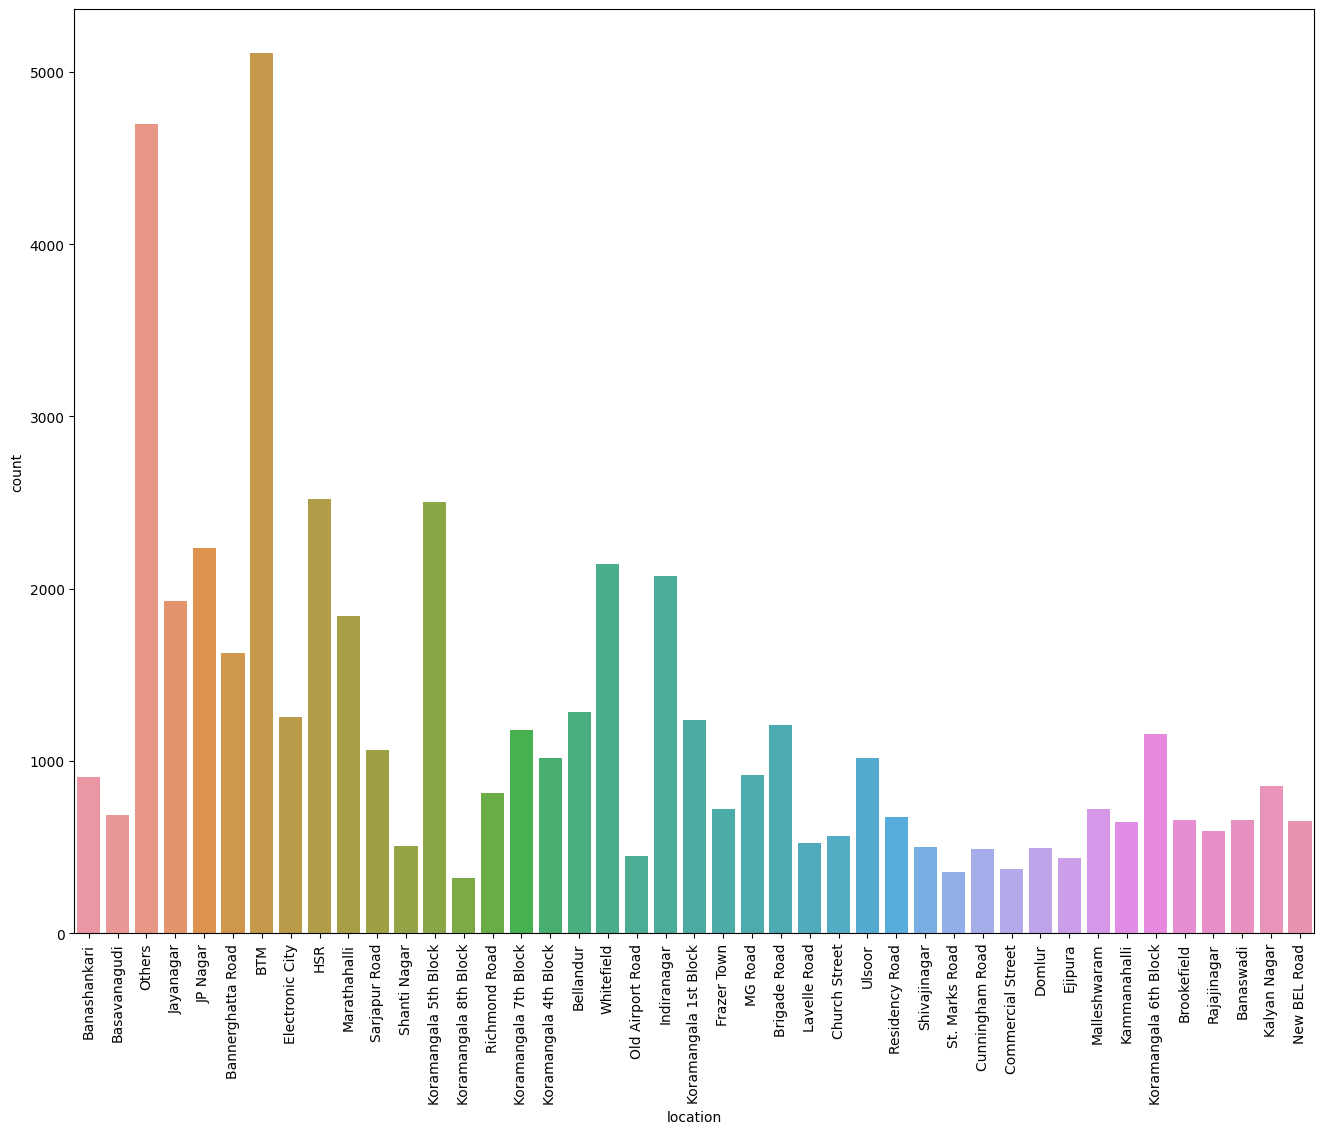

In [24]:
plt.figure(figsize=(16,12))
ax=sns.countplot(x="location",data= df)
plt.xticks(rotation=90)

**VISUALIZING THE ONLINE ORDER**

<Axes: xlabel='online_order', ylabel='count'>

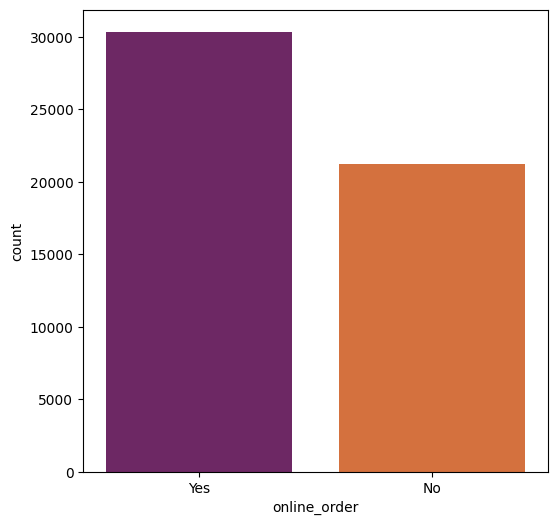

In [25]:
plt.figure(figsize=(6,6))
sns.countplot(x="online_order",data = df,palette = "inferno")

**VISUALIZING THE BOOK_TABLE**

<Axes: xlabel='book_table', ylabel='count'>

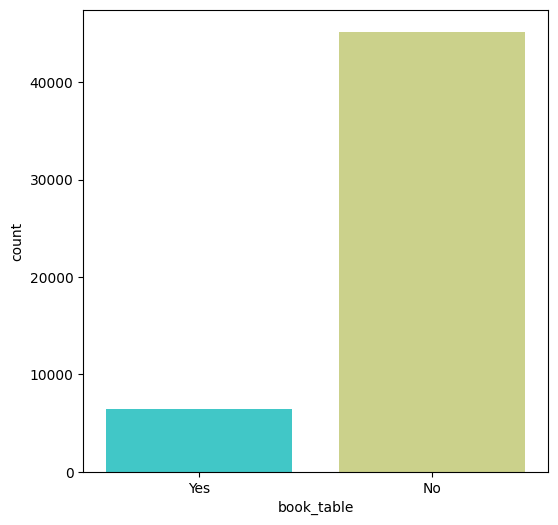

In [26]:
plt.figure(figsize=(6,6))
sns.countplot(x="book_table",data = df,palette="rainbow")

**VISULIZING ONLINE ORDER VS RATE**

<Axes: xlabel='online_order', ylabel='rate'>

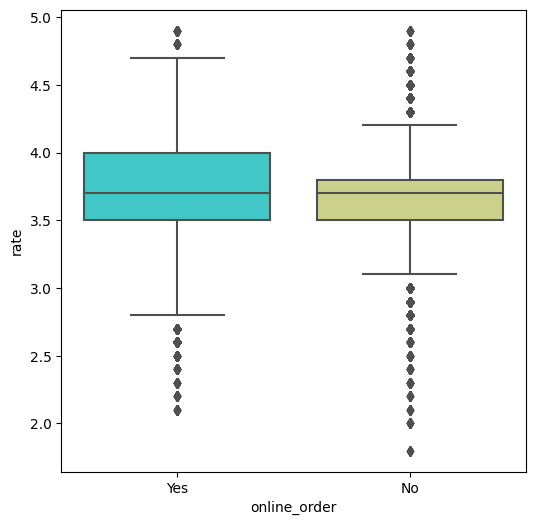

In [27]:
plt.figure(figsize=(6,6))
sns.boxplot(x="online_order",y= "rate",data =df,palette="rainbow")

**VISULIZING BOOK TABLE VS RATE**

<Axes: xlabel='book_table', ylabel='rate'>

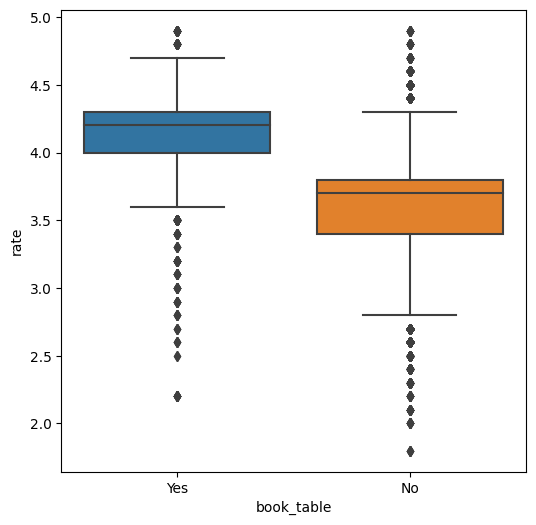

In [28]:
plt.figure(figsize=(6,6))
sns.boxplot(x="book_table",y="rate",data= df)

**VISULIZING ONLINE ORDER FACILITY,LOCATION WISE**

In [29]:
df1 = df.groupby(["location","online_order"])["name"].count()
df1.to_csv("location_online.csv")
df1 = pd.read_csv("location_online.csv")
df1 = pd.pivot_table(df1,values= None,index=["location"],columns=["online_order"],fill_value=0,aggfunc=np.sum)
df1

/tmp/ipykernel_18/2619917276.py:4: FutureWarning: The provided callable <function sum at 0x7d55ac13f520> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1 = pd.pivot_table(df1,values= None,index=["location"],columns=["online_order"],fill_value=0,aggfunc=np.sum)


name      
online_order             No   Yes
location                         
BTM                    1789  3320
Banashankari            397   507
Banaswadi               321   338
Bannerghatta Road       704   924
Basavanagudi            243   441
Bellandur               523   760
Brigade Road            552   658
Brookefield             241   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  261   235
Ejipura                 219   219
Electronic City         681   575
Frazer Town             293   427
HSR                     602  1919
Indiranagar             743  1332
JP Nagar                917  1317
Jayanagar               562  1364
Kalyan Nagar            355   498
Kammanahalli            267   380
Koramangala 1st Block   385   852
Koramangala 4th Block   459   558
Koramangala 5th Block   889  1613
Koramangala 6th Block   457   697
Koramangala 7th Block   394   785
Koramangala 8th Block   108   212
Lavelle Road            321   203
MG Road                 544   373
Malleshwaram            310   412
Marathahalli            734  1109
New BEL Road            257   392
Old Airport Road        230   216
Others                 2008  2691
Rajajinagar             286   305
Residency Road          425   247
Richmond Road           565   246
Sarjapur Road           335   728
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          185   167
Ulsoor                  395   622
Whitefield             1005  1135

<Axes: xlabel='location'>

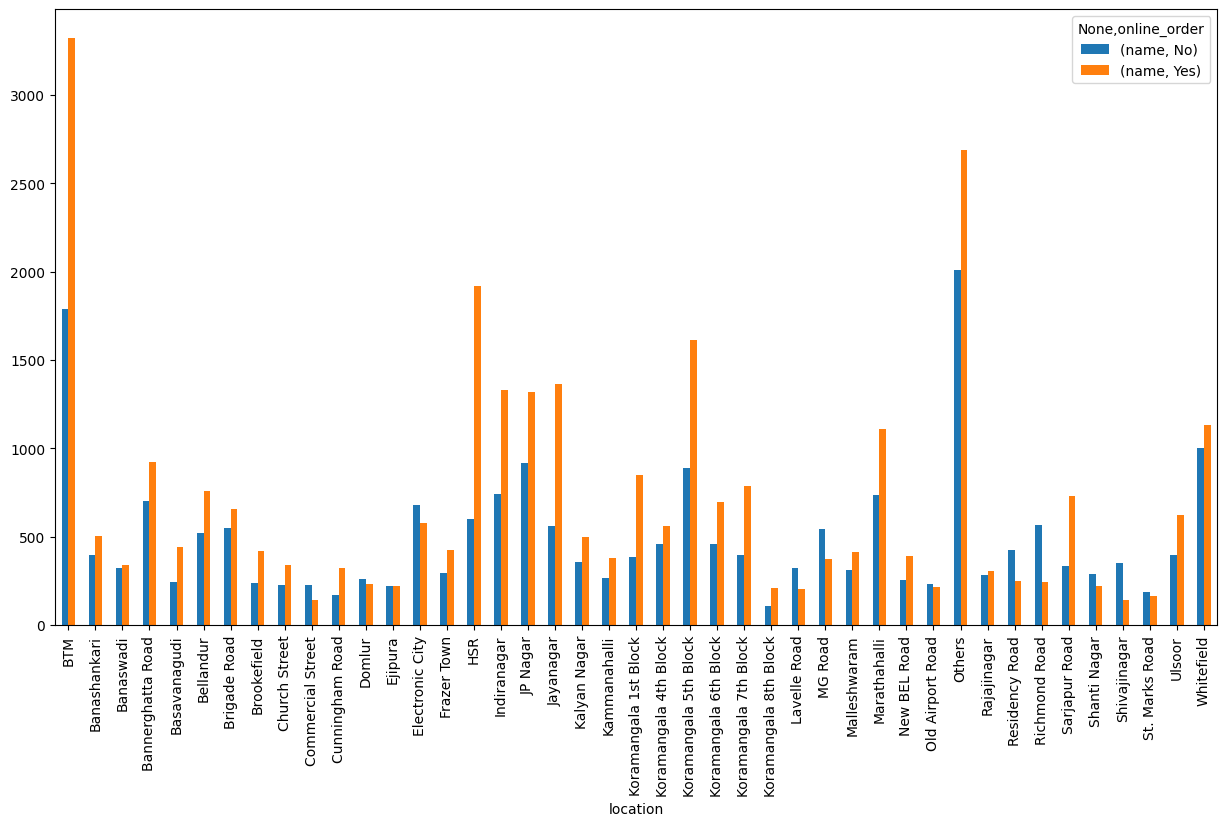

In [30]:
df1.plot(kind="bar",figsize=(15,8))

**VISULIZING BOOK TABLE FACILITY,LOCATION WISE**

In [31]:
df2 = df.groupby(["location","book_table"])["name"].count()
df2.to_csv("location_booktable.csv")
df2 = pd.read_csv("location_booktable.csv")
df2 = pd.pivot_table(df2,values=None,index=["location"],columns=["book_table"],fill_value=0,aggfunc=np.sum)
df2

/tmp/ipykernel_18/2729174228.py:4: FutureWarning: The provided callable <function sum at 0x7d55ac13f520> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df2 = pd.pivot_table(df2,values=None,index=["location"],columns=["book_table"],fill_value=0,aggfunc=np.sum)


name     
book_table               No  Yes
location                        
BTM                    4942  167
Banashankari            841   63
Banaswadi               651    8
Bannerghatta Road      1529   99
Basavanagudi            668   16
Bellandur              1185   98
Brigade Road           1034  176
Brookefield             584   74
Church Street           385  181
Commercial Street       370    0
Cunningham Road         315  175
Domlur                  441   55
Ejipura                 438    0
Electronic City        1158   98
Frazer Town             712    8
HSR                    2304  217
Indiranagar            1627  448
JP Nagar               1919  315
Jayanagar              1647  279
Kalyan Nagar            704  149
Kammanahalli            598   49
Koramangala 1st Block  1187   50
Koramangala 4th Block   695  322
Koramangala 5th Block  1810  692
Koramangala 6th Block  1042  112
Koramangala 7th Block  1017  162
Koramangala 8th Block   303   17
Lavelle Road            296  228
MG Road                 570  347
Malleshwaram            633   89
Marathahalli           1680  163
New BEL Road            593   56
Old Airport Road        387   59
Others                 4349  350
Rajajinagar             550   41
Residency Road          523  149
Richmond Road           695  116
Sarjapur Road           909  154
Shanti Nagar            451   57
Shivajinagar            475   23
St. Marks Road          228  124
Ulsoor                  840  177
Whitefield             1887  253

<Axes: xlabel='location'>

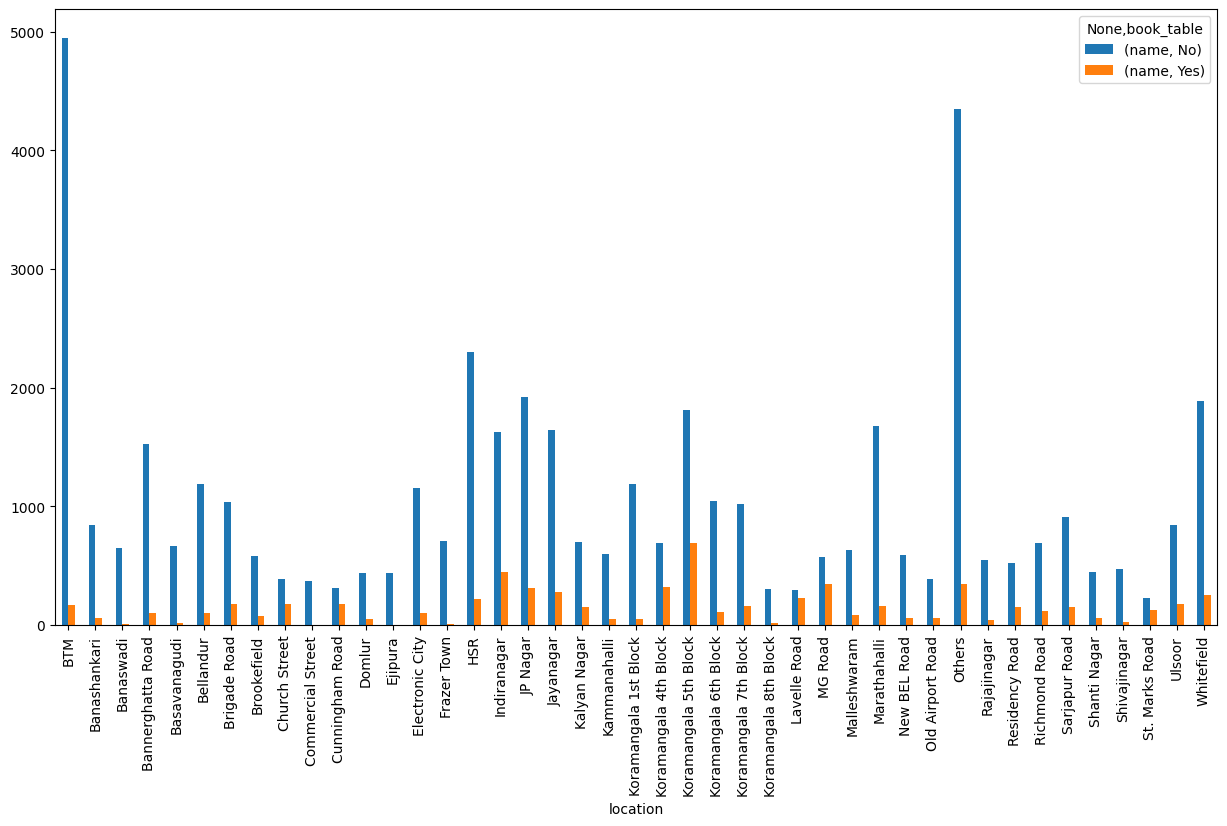

In [32]:
df2.plot(kind="bar",figsize=(15,8))

**VISULIZING TYPES OF RESTAURENTS VS RATE**

<Axes: xlabel='Type', ylabel='rate'>

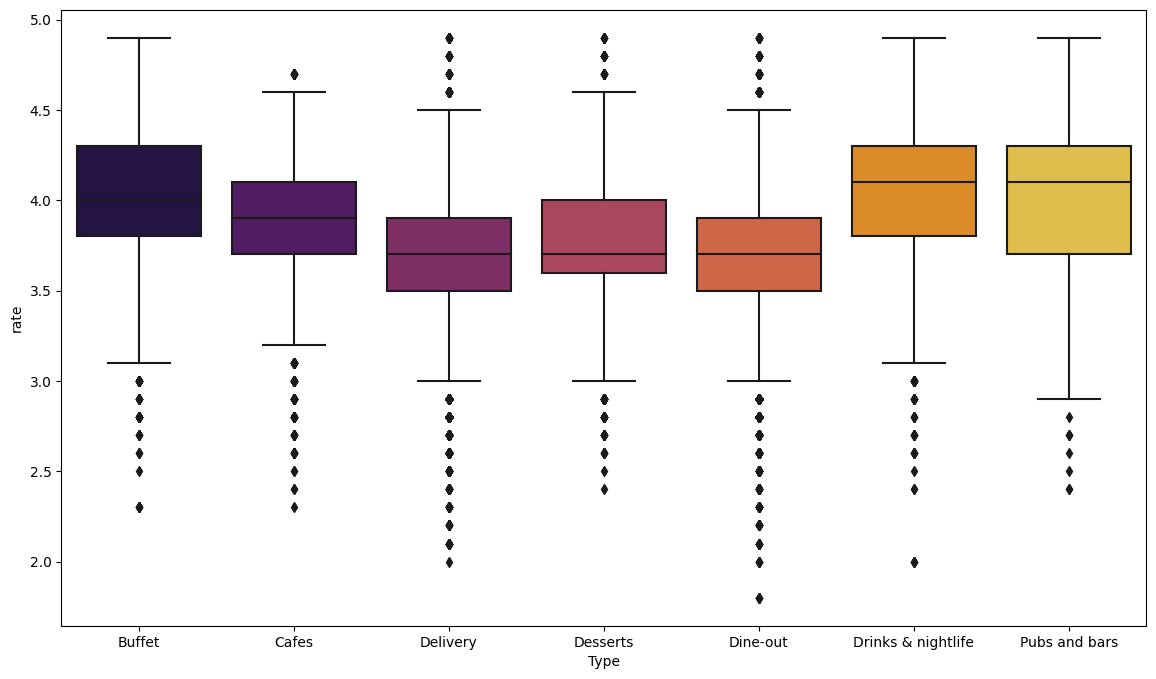

In [33]:
plt.figure(figsize=(14,8))
sns.boxplot(x="Type",y ="rate",data=df,palette="inferno")

**GROUPING TYPES OF RESTAURENTS ,LOCATION WISE**

In [34]:
df3 = df.groupby(["location","Type"])["name"].count()
df3.to_csv("location_Type.csv")
df3 = pd.read_csv("location_Type.csv")
df3 = pd.pivot_table(df3,values=None,index=["location"],columns=["Type"],fill_value=0,aggfunc=np.sum)
df3

/tmp/ipykernel_18/1694600172.py:4: FutureWarning: The provided callable <function sum at 0x7d55ac13f520> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 = pd.pivot_table(df3,values=None,index=["location"],columns=["Type"],fill_value=0,aggfunc=np.sum)


name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       25    83     3082      202     1676   
Banashankari               7    36      419       71      357   
Banaswadi                  0    24      320       37      271   
Bannerghatta Road          9    46      842      137      583   
Basavanagudi               7    11      344       66      251   
Bellandur                 28    36      624       77      485   
Brigade Road              25    46      497      108      455   
Brookefield                6    17      340       45      246   
Church Street             19    51      193       29      215   
Commercial Street          0    13      121       77      159   
Cunningham Road           29    34      194       26      184   
Domlur                    15    17      261       35      144   
Ejipura                    0     0      250       16      172   
Electronic City           23    24      575       71      521   
Frazer Town                1    11      474       56      174   
HSR                       19    49     1714      123      584   
Indiranagar               38   100     1116      146      540   
JP Nagar                  45    76     1159      166      730   
Jayanagar                 27    77     1049      182      579   
Kalyan Nagar               9    45      370       88      323   
Kammanahalli               2    27      332       35      245   
Koramangala 1st Block      3    26      717       70      398   
Koramangala 4th Block     21    53      464       81      302   
Koramangala 5th Block     65   151     1082      210      852   
Koramangala 6th Block     18    43      526       70      423   
Koramangala 7th Block     25    52      508      127      417   
Koramangala 8th Block      0    10      213       28       67   
Lavelle Road              30    27      129       50      193   
MG Road                   51    78      271       73      349   
Malleshwaram              11    31      269       85      292   
Marathahalli              37    32      995      107      643   
New BEL Road               4    29      341       34      225   
Old Airport Road          12     5      204       37      167   
Others                    83   123     2614      253     1506   
Rajajinagar               10     4      258       55      251   
Residency Road            20    31      187       63      290   
Richmond Road             63    25      257       78      360   
Sarjapur Road             25    23      565       83      326   
Shanti Nagar               9    22      198       39      229   
Shivajinagar               6    17      143       37      280   
St. Marks Road             5    10      115       10      150   
Ulsoor                    16    56      462       71      359   
Whitefield                28    51     1064      139      778   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Brigade Road                          57            22  
Brookefield                            4             0  
Church Street                         36            23  
Commercial Street                      0             0  
Cunningham Road                       16             7  
Domlur                                12            12  
Ejipura                                0             0  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR    

<Axes: xlabel='location'>

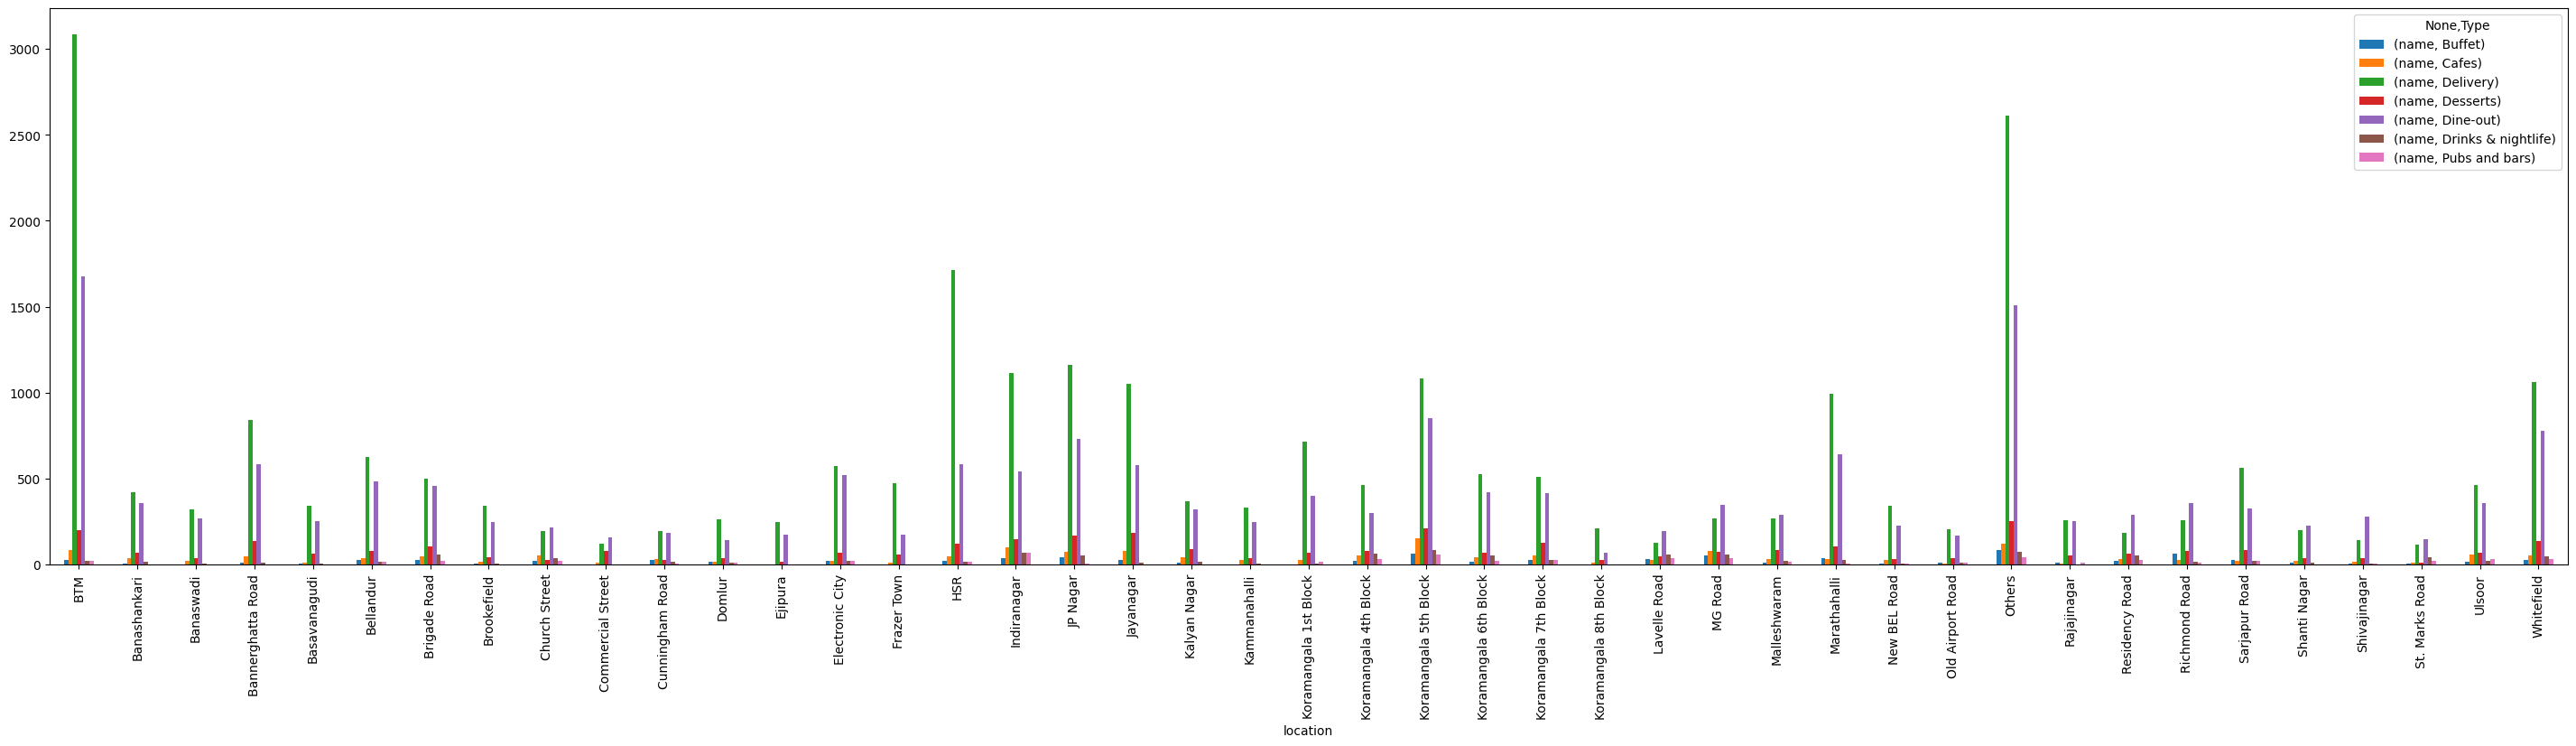

In [35]:
df3.plot(kind="bar",figsize=(36,8))

**NO.OF VOTES,LOCATION WISE**

In [36]:
df4= df[["location","votes"]]
df4.drop_duplicates()
df5 = df4.groupby(["location"])["votes"].sum()
df5 = df5.to_frame()
df5 = df5.sort_values("votes",ascending = False)
df5.head()

,votes
location,
Koramangala 5th Block,2218762
Indiranagar,1188487
Koramangala 4th Block,685156
BTM,618986
Church Street,590306


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'BTM'),
  Text(4, 0, 'Church Street'),
  Text(5, 0, 'JP Nagar'),
  Text(6, 0, 'Others'),
  Text(7, 0, 'HSR'),
  Text(8, 0, 'Lavelle Road'),
  Text(9, 0, 'Koramangala 7th Block'),
  Text(10, 0, 'Jayanagar'),
  Text(11, 0, 'Whitefield'),
  Text(12, 0, 'Koramangala 6th Block'),
  Text(13, 0, 'Marathahalli'),
  Text(14, 0, 'MG Road'),
  Text(15, 0, 'Brigade Road'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'Cunningham Road'),
  Text(19, 0, 'St. Marks Road'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Bannerghatta Road'),
  Text(23, 0, 'Bellandur'),
  Text(24, 0, 'Ulsoor'),
  Text(25, 0, 'New BEL Roa

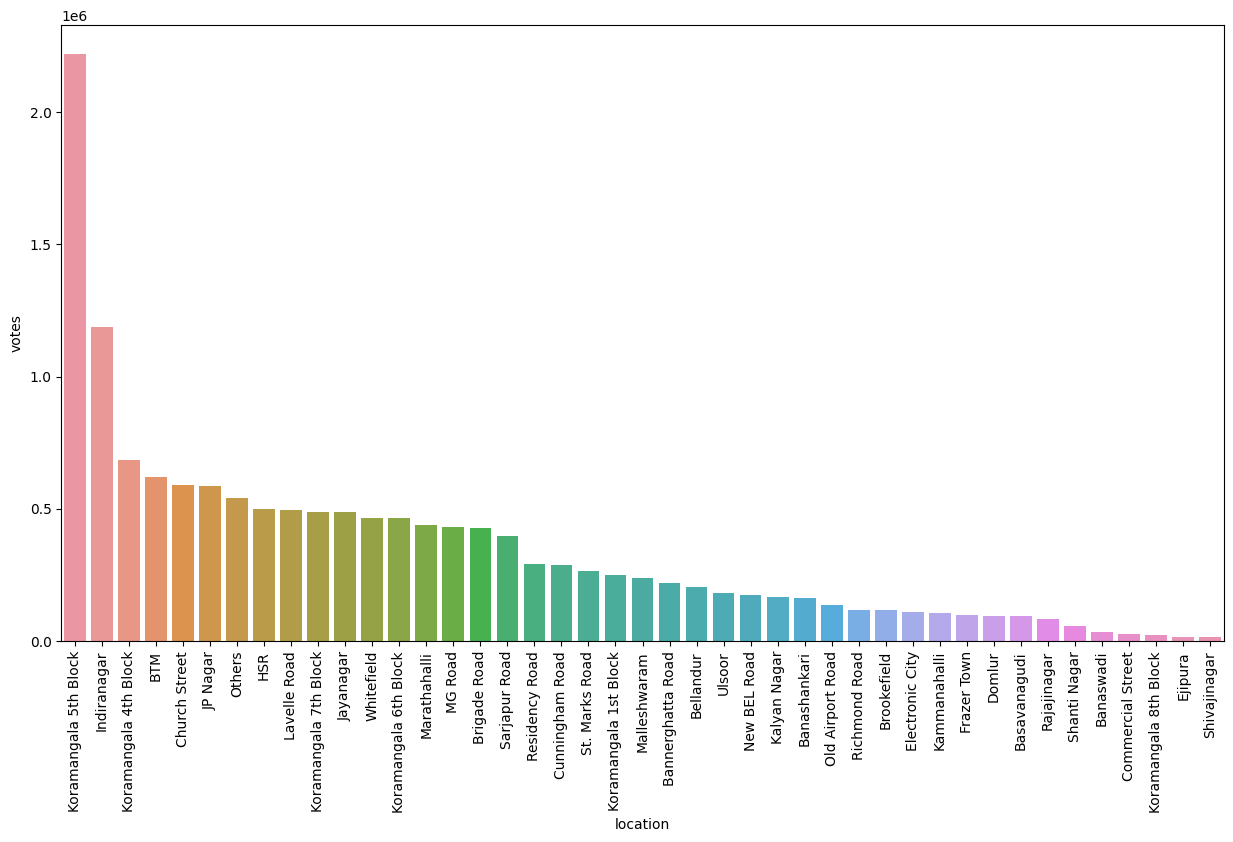

In [37]:
plt.figure(figsize=(15,8))
sns.barplot(x=df5.index,y=df5["votes"])
plt.xticks(rotation=90)


**VISULIZING TOP CUISINES**

In [38]:
df6 = df[["cuisines","votes"]]
df6.drop_duplicates()
df7 = df6.groupby(["cuisines"])["votes"].sum()
df7 = df7.to_frame()
df7 = df7.sort_values("votes",ascending=False)
df7.head()

,votes
cuisines,
others,11572666
North Indian,558618
"North Indian, Chinese",259502
South Indian,161983
"North Indian, Mughlai",103706


In [39]:
df7 = df7.iloc[1:,:]
df7.head()

,votes
cuisines,
North Indian,558618
"North Indian, Chinese",259502
South Indian,161983
"North Indian, Mughlai",103706
Chinese,101728


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68]),
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'North Indian, Chinese'),
  Text(2, 0, 'South Indian'),
  Text(3, 0, 'North Indian, Mughlai'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Cafe'),
  Text(6, 0, 'North Indian, South Indian'),
  Text(7, 0, 'Desserts'),
  Text(8, 0, 'Chinese, Momos'),
  Text(9, 0, 'Ice Cream, Desserts'),
  Text(10, 0, 'Cafe, Continental'),
  Text(11, 0, 'Biryani, North Indian, Chinese'),
  Text(12, 0, 'Chinese, Thai, Momos'),
  Text(13, 0, 'South Indian, North Indian, Chinese'),
  Text(14, 0, 'Desserts, Beverages'),
  Text(15, 0, 'Biryani'),
  Text(16, 0, 'Finger Food'),
  Text(17, 0, 'Bakery, Desserts'),
  Text(18, 0, 'Burger, Fast Food'),
  Text(19, 0, '

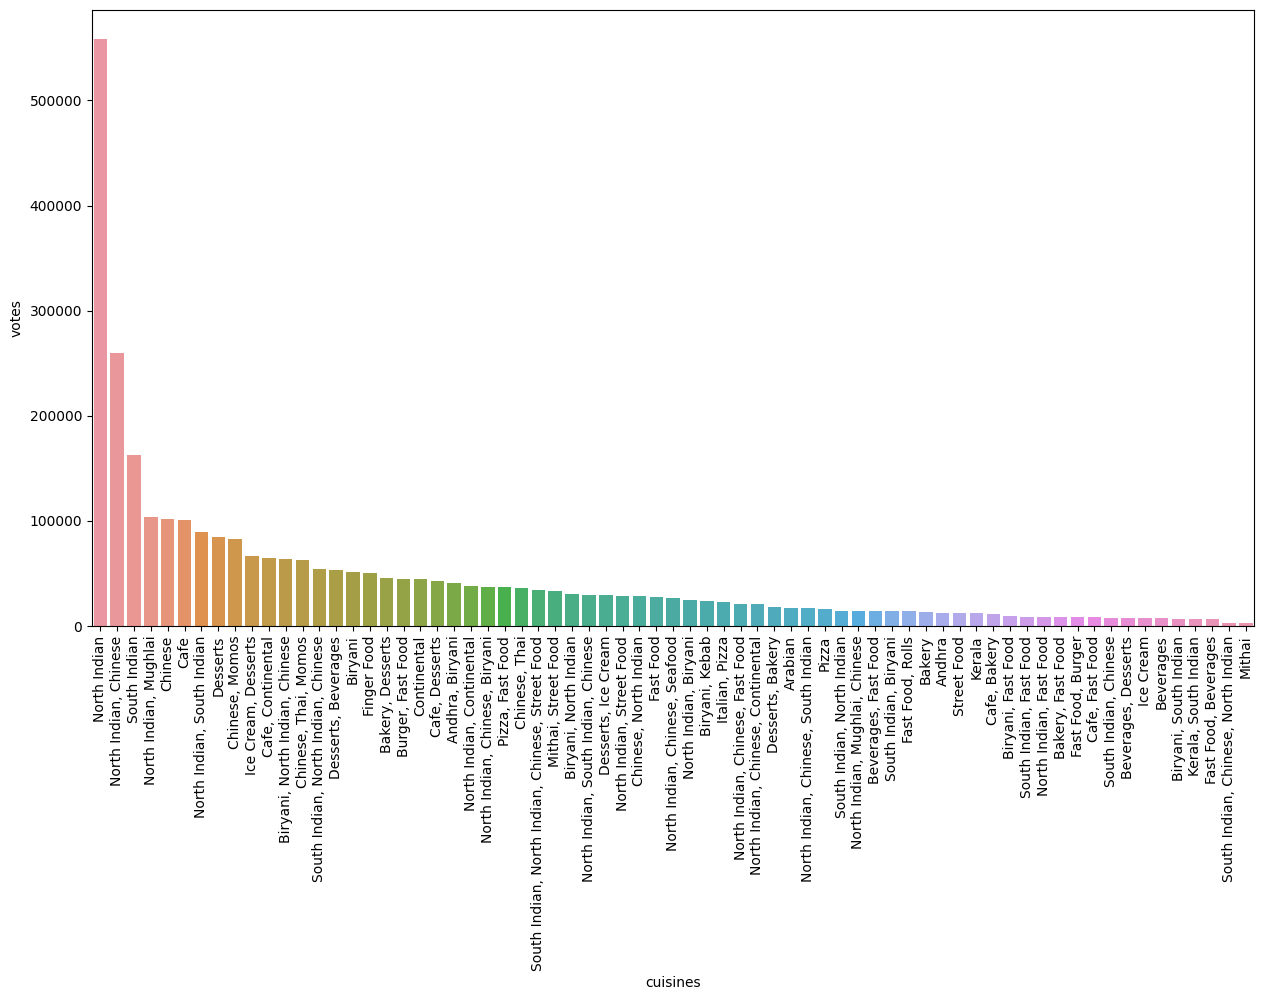

In [40]:
plt.figure(figsize=(15,8))
sns.barplot(x=df7.index,y=df7["votes"])
plt.xticks(rotation=90)